In [2]:
# Install opencv-python
# pip install opencv-python

import os # operating system functions, shutil # high-level file operations
import os.path  # for manipulation of file path names
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras

import tflearn
from tflearn.layers.conv import conv_2d, max_pool_2d
from tflearn.layers.core import input_data, dropout, fully_connected
from tflearn.layers.estimator import regression

from matplotlib import pyplot as plt  # for display of images

# Open CV for image processing
# Installed on Mac with pip install opencv-python 
import cv2

# The paths to the directories where the original raster files are located
cat_image_dir_name = 'C:/Users/XIA/Desktop/WK07/train/cat'
dog_image_dir_name = 'C:/Users/XIA/Desktop/WK07/train/dog'
test               = 'C:/Users/XIA/Desktop/WK07/test'

curses is not supported on this machine (please install/reinstall curses for an optimal experience)


In [4]:
# "Human" sorting of file names facilitated by
# https://nedbatchelder.com/blog/200712/human_sorting.html
import re

def tryint(s):
    try:
        return int(s)
    except:
        return s
    
def alphanum_key(s):
    """ Turn a string into a list of string and number chunks.
        "z23a" -> ["z", 23, "a"]
    """
    return [ tryint(c) for c in re.split('([0-9]+)', s) ]

def sort_nicely(l):
    """ Sort the given list in the way that humans expect.
    """
    l.sort(key=alphanum_key)

# Generate nicely sorted list of file names, excluding hidden files    
def directory_list (dir_name):
    start_list = os.listdir(dir_name)
    end_list = []
    for file in start_list:
        if (not file.startswith('.')):
            end_list.append(file) 
    end_list.sort(key = alphanum_key)        
    return(end_list)        

cat_file_names = directory_list(cat_image_dir_name)
dog_file_names = directory_list(dog_image_dir_name)
test_file_names= directory_list(test)

In [5]:
# Convert image to numpy array... 
# Three channels for color converted to grayscale
def parse_grayscale(image_file_path):
    image = cv2.imread(image_file_path, cv2.IMREAD_GRAYSCALE)
    return(image)
    
# Convert image to numpy array... three channels for color
def parse_color(image_file_path):
    image = cv2.imread(image_file_path, cv2.IMREAD_COLOR)
    # Default cv2 is BGR... need RGB
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    return(image)
  
def parse_grayscale_and_resize(image_file_path, size = (64, 64)):
    image = cv2.imread(image_file_path, cv2.IMREAD_GRAYSCALE)
    image = cv2.resize(image, size)
    return(image)

def parse_color_and_resize(image_file_path, size = (64, 64)):
    image = cv2.imread(image_file_path, cv2.IMREAD_COLOR)
    # Default cv2 is BGR... need RGB
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    image = cv2.resize(image, size)
    return(image)  
    
def show_grayscale_image(image):
    plt.imshow(image, cmap = 'gray') 
    plt.axis('off')
    plt.show()

def show_color_image(image):
    plt.imshow(image) 
    plt.axis('off')
    plt.show()   

In [6]:
# ----------------------------------------------------------------------
# Examine dimensions of original raster images 
# Results show considerable variability in image pixel dimensions
cats_shapes = []
for ifile in range(len(cat_file_names)):
    image_file_path = os.path.join(cat_image_dir_name, cat_file_names[ifile])
    image = parse_color(image_file_path)
    cats_shapes.append(image.shape)
print('\n\nCat image file shapes:\n')    
print(cats_shapes)    



Cat image file shapes:

[(374, 500, 3), (280, 300, 3), (396, 312, 3), (414, 500, 3), (375, 499, 3), (144, 175, 3), (303, 400, 3), (499, 495, 3), (345, 461, 3), (425, 320, 3), (499, 489, 3), (410, 431, 3), (224, 300, 3), (315, 499, 3), (267, 320, 3), (353, 405, 3), (258, 448, 3), (375, 499, 3), (374, 500, 3), (223, 320, 3), (374, 500, 3), (499, 431, 3), (345, 500, 3), (256, 334, 3), (374, 500, 3), (500, 345, 3), (374, 500, 3), (479, 370, 3), (270, 286, 3), (375, 499, 3), (262, 349, 3), (374, 500, 3), (374, 500, 3), (375, 499, 3), (499, 375, 3), (426, 499, 3), (311, 500, 3), (337, 499, 3), (337, 350, 3), (500, 374, 3), (383, 499, 3), (499, 333, 3), (173, 237, 3), (500, 356, 3), (102, 107, 3), (370, 500, 3), (433, 400, 3), (214, 258, 3), (93, 139, 3), (129, 180, 3), (196, 299, 3), (473, 256, 3), (300, 399, 3), (457, 492, 3), (499, 500, 3), (500, 344, 3), (332, 499, 3), (291, 335, 3), (375, 499, 3), (331, 464, 3), (176, 180, 3), (226, 328, 3), (377, 500, 3), (374, 500, 3), (374, 500, 3),

In [7]:
dogs_shapes = []
for ifile in range(len(dog_file_names)):
    image_file_path = os.path.join(dog_image_dir_name, dog_file_names[ifile])
    image = parse_color(image_file_path)
    dogs_shapes.append(image.shape)    
print('\n\nDog image file shapes:\n') 
print(dogs_shapes)



Dog image file shapes:

[(375, 499, 3), (499, 327, 3), (199, 187, 3), (375, 499, 3), (287, 300, 3), (376, 499, 3), (488, 499, 3), (264, 299, 3), (500, 469, 3), (500, 368, 3), (292, 269, 3), (101, 135, 3), (161, 98, 3), (428, 362, 3), (386, 500, 3), (374, 500, 3), (380, 500, 3), (335, 272, 3), (348, 215, 3), (225, 299, 3), (332, 500, 3), (499, 415, 3), (371, 499, 3), (403, 499, 3), (500, 274, 3), (375, 499, 3), (224, 300, 3), (375, 499, 3), (432, 287, 3), (376, 500, 3), (457, 466, 3), (500, 297, 3), (375, 499, 3), (375, 499, 3), (374, 500, 3), (243, 323, 3), (240, 319, 3), (371, 400, 3), (374, 499, 3), (356, 324, 3), (197, 149, 3), (240, 319, 3), (374, 500, 3), (249, 375, 3), (375, 499, 3), (320, 425, 3), (299, 243, 3), (477, 500, 3), (360, 480, 3), (375, 499, 3), (199, 157, 3), (500, 433, 3), (377, 499, 3), (267, 396, 3), (284, 400, 3), (420, 500, 3), (499, 492, 3), (400, 302, 3), (281, 499, 3), (331, 500, 3), (304, 448, 3), (342, 499, 3), (449, 337, 3), (499, 401, 3), (500, 419, 3),

In [8]:
test_shapes = []
for ifile in range(len(test_file_names)):
    image_file_path = os.path.join(test, test_file_names[ifile])
    image = parse_color(image_file_path)
    test_shapes.append(image.shape)    
print('\n\ntest shapes:\n') 
print(test_shapes)



test shapes:

[(499, 381, 3), (299, 296, 3), (299, 300, 3), (288, 374, 3), (400, 399, 3), (375, 499, 3), (148, 192, 3), (234, 325, 3), (380, 480, 3), (374, 500, 3), (370, 278, 3), (465, 315, 3), (376, 500, 3), (293, 500, 3), (499, 377, 3), (374, 500, 3), (399, 228, 3), (459, 499, 3), (272, 328, 3), (232, 356, 3), (450, 443, 3), (255, 384, 3), (252, 377, 3), (500, 393, 3), (294, 499, 3), (265, 480, 3), (375, 499, 3), (500, 499, 3), (365, 500, 3), (500, 340, 3), (364, 224, 3), (288, 383, 3), (380, 499, 3), (375, 499, 3), (278, 149, 3), (375, 499, 3), (387, 500, 3), (119, 150, 3), (375, 499, 3), (312, 499, 3), (375, 499, 3), (400, 369, 3), (374, 500, 3), (240, 227, 3), (400, 399, 3), (50, 41, 3), (300, 399, 3), (450, 342, 3), (500, 399, 3), (308, 368, 3), (375, 499, 3), (374, 500, 3), (499, 438, 3), (321, 500, 3), (348, 500, 3), (369, 416, 3), (197, 189, 3), (349, 350, 3), (199, 190, 3), (336, 447, 3), (374, 500, 3), (239, 320, 3), (303, 200, 3), (374, 500, 3), (357, 500, 3), (341, 432,

In [9]:
# ----------------------------------------------------------------------
print('\nProcessing image files to 64x64 color or grayscale arrays')
# Create cats_1000_64_64_3 and numpy array for 12500 cat images in color
cats_1000_64_64_3 = np.zeros((12500, 64, 64, 3))  
for ifile in range(len(cat_file_names)):
    image_file_path = os.path.join(cat_image_dir_name, cat_file_names[ifile])
    image = parse_color_and_resize(image_file_path, size = (64, 64))
    cats_1000_64_64_3[ifile,:,:,:] = image
       
# Create dogs_1000_64_64_3 and numpy array for 12500 dog images in color   
dogs_1000_64_64_3 = np.zeros((12500, 64, 64, 3))  
for ifile in range(len(dog_file_names)):
    image_file_path = os.path.join(dog_image_dir_name, dog_file_names[ifile])
    image = parse_color_and_resize(image_file_path, size = (64, 64))
    dogs_1000_64_64_3[ifile,:,:,:] = image
    
# Create test_1000_64_64_1 and numpy array for 12500 cat images in grayscale
test_1000_64_64_3 = np.zeros((12500, 64, 64, 3))  
for ifile in range(len(test_file_names)):
    image_file_path = os.path.join(test, test_file_names[ifile])
    image = parse_grayscale_and_resize(image_file_path, size = (64, 64))
    cats_1000_64_64_3[ifile,:,:,0] = image

# Create cats_1000_64_64_1 and numpy array for 12500 cat images in grayscale
cats_1000_64_64_1 = np.zeros((12500, 64, 64, 1))  
for ifile in range(len(cat_file_names)):
    image_file_path = os.path.join(cat_image_dir_name, cat_file_names[ifile])
    image = parse_grayscale_and_resize(image_file_path, size = (64, 64))
    cats_1000_64_64_1[ifile,:,:,0] = image
       
# Create dogs_1000_64_64_1 and numpy array for 12500 dog images in grayscale   
dogs_1000_64_64_1 = np.zeros((12500, 64, 64, 1))  
for ifile in range(len(dog_file_names)):
    image_file_path = os.path.join(dog_image_dir_name, dog_file_names[ifile])
    image = parse_grayscale_and_resize(image_file_path, size = (64, 64))
    dogs_1000_64_64_1[ifile,:,:,0] = image
    
# Create test_1000_64_64_1 and numpy array for 12500 cat images in grayscale
test_1000_64_64_1 = np.zeros((12500, 64, 64, 1))  
for ifile in range(len(test_file_names)):
    image_file_path = os.path.join(test, test_file_names[ifile])
    image = parse_grayscale_and_resize(image_file_path, size = (64, 64))
    cats_1000_64_64_1[ifile,:,:,0] = image


Processing image files to 64x64 color or grayscale arrays


In [10]:
# Documentation on npy binary format for saving numpy arrays for later use
#     https://towardsdatascience.com/
#             why-you-should-start-using-npy-file-more-often-df2a13cc0161 
    
# The directory where we store the numpy array objects
# store our smaller dataset
outdir = 'C:/Users/XIA/Desktop/WK07'
       
np.save(os.path.join(outdir, 'cats_1000_64_64_3.npy'), cats_1000_64_64_3)
np.save(os.path.join(outdir, 'dogs_1000_64_64_3.npy'), dogs_1000_64_64_3)
np.save(os.path.join(outdir, 'test_1000_64_64_3.npy'), test_1000_64_64_3)
np.save(os.path.join(outdir, 'cats_1000_64_64_1.npy'), cats_1000_64_64_1)
np.save(os.path.join(outdir, 'dogs_1000_64_64_1.npy'), dogs_1000_64_64_1)
np.save(os.path.join(outdir, 'test_1000_64_64_1.npy'), test_1000_64_64_1)

In [11]:
# ------------------------------------------------------------------------
print('\nProcessing image files to 128x128 color or grayscale arrays')
# Create cats_1000_128_128_3 and numpy array for 12500 cat images in color
cats_1000_128_128_3 = np.zeros((12500, 128, 128, 3))  
for ifile in range(len(cat_file_names)):
    image_file_path = os.path.join(cat_image_dir_name, cat_file_names[ifile])
    image = parse_color_and_resize(image_file_path, size = (128, 128))
    cats_1000_128_128_3[ifile,:,:,:] = image
       
# Create dogs_1000_128_128_3 and numpy array for 12500 dog images in color   
dogs_1000_128_128_3 = np.zeros((12500, 128, 128, 3))  
for ifile in range(len(dog_file_names)):
    image_file_path = os.path.join(dog_image_dir_name, dog_file_names[ifile])
    image = parse_color_and_resize(image_file_path, size = (128, 128))
    dogs_1000_128_128_3[ifile,:,:,:] = image

# Create test_1000_128_128_3 and numpy array for 12500 cat images in grayscale
test_1000_128_128_3 = np.zeros((12500, 128, 128, 3))  
for ifile in range(len(test_file_names)):
    image_file_path = os.path.join(test, test_file_names[ifile])
    image = parse_grayscale_and_resize(image_file_path, size = (128, 128))
    test_1000_128_128_3[ifile,:,:,0] = image    

# Create cats_1000_128_128_1 and numpy array for 12500 cat images in grayscale
cats_1000_128_128_1 = np.zeros((12500, 128, 128, 1))  
for ifile in range(len(cat_file_names)):
    image_file_path = os.path.join(cat_image_dir_name, cat_file_names[ifile])
    image = parse_grayscale_and_resize(image_file_path, size = (128, 128))
    cats_1000_128_128_1[ifile,:,:,0] = image
       
# Create dogs_1000_128_128_1 and numpy array for 12500 dog images in grayscale   
dogs_1000_128_128_1 = np.zeros((12500, 128, 128, 1))  
for ifile in range(len(dog_file_names)):
    image_file_path = os.path.join(dog_image_dir_name, dog_file_names[ifile])
    image = parse_grayscale_and_resize(image_file_path, size = (128, 128))
    dogs_1000_128_128_1[ifile,:,:,0] = image
    
# Create test_1000_128_128_1 and numpy array for 12500 cat images in grayscale
test_1000_128_128_1 = np.zeros((12500, 128, 128, 1))  
for ifile in range(len(test_file_names)):
    image_file_path = os.path.join(test, test_file_names[ifile])
    image = parse_grayscale_and_resize(image_file_path, size = (128, 128))
    test_1000_128_128_1[ifile,:,:,0] = image


Processing image files to 128x128 color or grayscale arrays


In [12]:
# Documentation on npy binary format for saving numpy arrays for later use
#     https://towardsdatascience.com/
#             why-you-should-start-using-npy-file-more-often-df2a13cc0161 
    
# The directory where we store the numpy array objects
# store our smaller dataset
outdir = 'C:/Users/XIA/Desktop/WK07'

np.save(os.path.join(outdir, 'cats_1000_128_128_3.npy'), cats_1000_128_128_3)
np.save(os.path.join(outdir, 'dogs_1000_128_128_3.npy'), dogs_1000_128_128_3)
np.save(os.path.join(outdir, 'test_1000_128_128_3.npy'), test_1000_128_128_3)
np.save(os.path.join(outdir, 'cats_1000_128_128_1.npy'), cats_1000_128_128_1)
np.save(os.path.join(outdir, 'dogs_1000_128_128_1.npy'), dogs_1000_128_128_1)
np.save(os.path.join(outdir, 'test_1000_128_128_1.npy'), test_1000_128_128_1)

In [ ]:
# # ------------------------------------------------------------------------
# print('\nProcessing image files to 256x256 color or grayscale arrays')
# # Create cats_1000_256_256_3 and numpy array for 12500 cat images in color
# cats_1000_256_256_3 = np.zeros((12500, 256, 256, 3))  
# for ifile in range(len(cat_file_names)):
#     image_file_path = os.path.join(cat_image_dir_name, cat_file_names[ifile])
#     image = parse_color_and_resize(image_file_path, size = (256, 256))
#     cats_1000_256_256_3[ifile,:,:,:] = image
       
# # Create dogs_1000_256_256_3 and numpy array for 12500 dog images in color   
# dogs_1000_256_256_3 = np.zeros((12500, 256, 256, 3))  
# for ifile in range(len(dog_file_names)):
#     image_file_path = os.path.join(dog_image_dir_name, dog_file_names[ifile])
#     image = parse_color_and_resize(image_file_path, size = (256, 256))
#     dogs_1000_256_256_3[ifile,:,:,:] = image

# # Create cats_1000_256_256_1 and numpy array for 12500 cat images in grayscale
# cats_1000_256_256_1 = np.zeros((12500, 256, 256, 1))  
# for ifile in range(len(cat_file_names)):
#     image_file_path = os.path.join(cat_image_dir_name, cat_file_names[ifile])
#     image = parse_grayscale_and_resize(image_file_path, size = (256, 256))
#     cats_1000_256_256_1[ifile,:,:,0] = image
       
# # Create dogs_1000_256_256_1 and numpy array for 12500 dog images in grayscale   
# dogs_1000_256_256_1 = np.zeros((12500, 256, 256, 1))  
# for ifile in range(len(dog_file_names)):
#     image_file_path = os.path.join(dog_image_dir_name, dog_file_names[ifile])
#     image = parse_grayscale_and_resize(image_file_path, size = (256, 256))
#     dogs_1000_256_256_1[ifile,:,:,0] = image  

In [ ]:
# # ------------------------------------------------------------------------
# print('\nProcessing image files to 512x512 color or grayscale arrays')
# # Create cats_1000_512_512_3 and numpy array for 12500 cat images in color
# cats_1000_512_512_3 = np.zeros((12500, 512, 512, 3))  
# for ifile in range(len(cat_file_names)):
#     image_file_path = os.path.join(cat_image_dir_name, cat_file_names[ifile])
#     image = parse_color_and_resize(image_file_path, size = (512, 512))
#     cats_1000_512_512_3[ifile,:,:,:] = image
       
# # Create dogs_1000_512_512_3 and numpy array for 12500 dog images in color   
# dogs_1000_512_512_3 = np.zeros((12500, 512, 512, 3))  
# for ifile in range(len(dog_file_names)):
#     image_file_path = os.path.join(dog_image_dir_name, dog_file_names[ifile])
#     image = parse_color_and_resize(image_file_path, size = (512, 512))
#     dogs_1000_512_512_3[ifile,:,:,:] = image

# # Create cats_1000_512_512_1 and numpy array for 12500 cat images in grayscale
# cats_1000_512_512_1 = np.zeros((12500, 512, 512, 1))  
# for ifile in range(len(cat_file_names)):
#     image_file_path = os.path.join(cat_image_dir_name, cat_file_names[ifile])
#     image = parse_grayscale_and_resize(image_file_path, size = (512, 512))
#     cats_1000_512_512_1[ifile,:,:,0] = image
       
# # Create dogs_1000_512_512_1 and numpy array for 12500 dog images in grayscale   
# dogs_1000_512_512_1 = np.zeros((12500, 512, 512, 1))  
# for ifile in range(len(dog_file_names)):
#     image_file_path = os.path.join(dog_image_dir_name, dog_file_names[ifile])
#     image = parse_grayscale_and_resize(image_file_path, size = (512, 512))
#     dogs_1000_512_512_1[ifile,:,:,0] = image   

In [ ]:
# Documentation on npy binary format for saving numpy arrays for later use
#     https://towardsdatascience.com/
#             why-you-should-start-using-npy-file-more-often-df2a13cc0161 
    
# The directory where we store the numpy array objects
# store our smaller dataset
outdir = 'C:/Users/XIA/Desktop/WK07'

# np.save(os.path.join(outdir, 'cats_1000_256_256_3.npy'), cats_1000_256_256_3)
# np.save(os.path.join(outdir, 'dogs_1000_256_256_3.npy'), dogs_1000_256_256_3)
# np.save(os.path.join(outdir, 'cats_1000_256_256_1.npy'), cats_1000_256_256_1)
# np.save(os.path.join(outdir, 'dogs_1000_256_256_1.npy'), dogs_1000_256_256_1)

# np.save(os.path.join(outdir, 'cats_1000_512_512_3.npy'), cats_1000_512_512_3)
# np.save(os.path.join(outdir, 'dogs_1000_512_512_3.npy'), dogs_1000_512_512_3)
# np.save(os.path.join(outdir, 'cats_1000_512_512_1.npy'), cats_1000_512_512_1)
# np.save(os.path.join(outdir, 'dogs_1000_512_512_1.npy'), dogs_1000_512_512_1)
    
# Note. Due to file size issues, only the 64x64 and 128x128 files were 
# uploaded to the Canas cours site. These files are in the zip archive
#   cats_dogs_64_128.zip    
    
print('\nRun complete')    

# Above code is to read image files 
## Need to come back to review

In [3]:
# coding: utf-8

# Initial deep neural network set-up from 
# Géron, A. 2017. Hands-On Machine Learning with Scikit-Learn 
#    & TensorFlow: Concepts, Tools, and Techniques to Build 
#    Intelligent Systems. Sebastopol, Calif.: O'Reilly. 
#    [ISBN-13 978-1-491-96229-9] 
#    Source code available at https://github.com/ageron/handson-ml
#    See file 10_introduction_to_artificial_neural_networks.ipynb 
#    Revised from MNIST to Cats and Dogs to begin Assignment 7
#    #CatsDogs# comment lines show additions/revisions for Cats and Dogs

# To support both python 2 and python 3
from __future__ import division, print_function, unicode_literals

RANDOM_SEED = 9999

# To make output stable across runs
def reset_graph(seed= RANDOM_SEED):
    tf.reset_default_graph()
    tf.set_random_seed(seed)
    np.random.seed(seed)

#CatsDogs# Old dimensions from MNIST no loger apply
#CatsDogs# height = 28
#CatsDogs# width = 28
height = 128
width  = 128   

In [32]:
#CatsDogs# 
# Documentation on npy binary format for saving numpy arrays for later use
#     https://towardsdatascience.com/
#             why-you-should-start-using-npy-file-more-often-df2a13cc0161
# Under the working directory, data files are in directory cats_dogs_64_128 
# Read in cats and dogs grayscale 64x64 files to create training data
cats_1000_128_128_1 = np.load('cats_1000_128_128_1.npy')
dogs_1000_128_128_1 = np.load('dogs_1000_128_128_1.npy')
test_1000_128_128_1 = np.load('test_1000_128_128_1.npy')

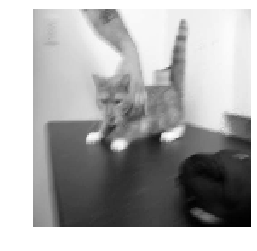

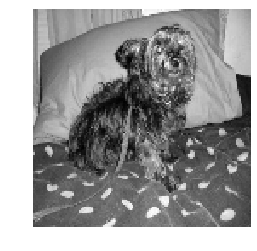

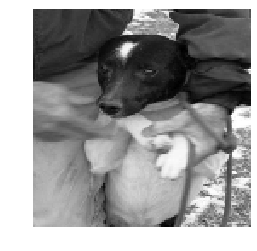

In [33]:
def show_grayscale_image(image):
    plt.imshow(image, cmap='gray')
    plt.axis('off')
    plt.show()
# Examine first cat and first dog grayscale images
show_grayscale_image(cats_1000_128_128_1[0,:,:,0])
show_grayscale_image(dogs_1000_128_128_1[0,:,:,0])
show_grayscale_image(test_1000_128_128_1[0,:,:,0])

In [34]:
# 300 and 100 nodes for layers 1 and 2 as used with MNIST from Geron
n_hidden1 = 300
n_hidden2 = 100

channels = 1  # When working with color images use channels = 3

n_inputs = height * width

#CatsDogs# Has two output values # MNIST had ten digits n_outputs = 10  
n_outputs = 2  # binary classification for Cats and Dogs, 1 output node 0/1

reset_graph()

# dnn... Deep neural network model from Geron Chapter 10
# Note that this model makes no use of the fact that we have
# pixel data arranged in rows and columns
# So a 64x64 matrix of raster values becomes a vector of 4096 input variables
X  = tf.placeholder(tf.float32, shape=(None, n_inputs), name="X")
y  = tf.placeholder(tf.int32, shape=(None), name="y")
y1 = tf.placeholder(tf.int32, shape=(None), name="y1")

In [35]:
def neuron_layer(X, n_neurons, name, activation=None):
    with tf.name_scope(name):
        n_inputs = int(X.get_shape()[1])
        stddev = 2 / np.sqrt(n_inputs)
        init = tf.truncated_normal((n_inputs, n_neurons), stddev=stddev)
        W = tf.Variable(init, name="kernel")
        b = tf.Variable(tf.zeros([n_neurons]), name="bias")
        Z = tf.matmul(X, W) + b
        if activation is not None:
            return activation(Z)
        else:
            return Z
        
with tf.name_scope("dnn"):
    hidden1 = neuron_layer(X, n_hidden1, name="hidden1",
                           activation=tf.nn.relu)
    hidden2 = neuron_layer(hidden1, n_hidden2, name="hidden2",
                           activation=tf.nn.relu)
    logits = neuron_layer(hidden2, n_outputs, name="outputs")

with tf.name_scope("loss"):
    xentropy = tf.nn.sparse_softmax_cross_entropy_with_logits(labels=y,
                                                              logits=logits)
    loss = tf.reduce_mean(xentropy, name="loss")

learning_rate = 0.01

with tf.name_scope("train"):
    optimizer = tf.train.GradientDescentOptimizer(learning_rate)
    training_op = optimizer.minimize(loss)
    
with tf.name_scope("eval"):
    correct = tf.nn.in_top_k(logits, y, 1)
    accuracy = tf.reduce_mean(tf.cast(correct, tf.float32))    

init = tf.global_variables_initializer()
saver = tf.train.Saver()

# Work the data for cats and dogs numpy arrays 
# These numpy arrays were generated in previous data prep work
# Stack the numpy arrays for the inputs
X_cat_dog = np.concatenate((cats_1000_128_128_1, dogs_1000_128_128_1), axis = 0) 
X_cat_dog = X_cat_dog.reshape(-1,width*height)

test_1000_128_128_1 = test_1000_128_128_1.reshape(-1,width*height)

In [61]:
# Scikit Learn for min-max scaling of the data
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(np.array([0., 255.]).reshape(-1,1))
X_cat_dog_min_max = scaler.transform(X_cat_dog)
X_test_cat_dog_min_max =scaler.transform(test_1000_128_128_1)

# Define the labels to be used 12500 cats = 0 12500 dogs = 1
y_cat_dog = np.concatenate((np.zeros((12500), dtype = np.int32), 
                      np.ones((12500), dtype = np.int32)), axis = 0)

# Scikit Learn for random splitting of the data  
from sklearn.model_selection import train_test_split

# Random splitting of the data in to training (80%) and test (20%)  
X_train, X_test, y_train, y_test = \
    train_test_split(X_cat_dog_min_max, y_cat_dog, test_size=0.20, 
                     random_state = RANDOM_SEED)

init = tf.global_variables_initializer()    

n_epochs = 50
batch_size = 100

with tf.Session() as sess:
    init.run()
    for epoch in range(n_epochs):
        for iteration in range(y_train.shape[0] // batch_size):
            X_batch = X_train[iteration*batch_size:(iteration + 1)*batch_size,:]
            y_batch = y_train[iteration*batch_size:(iteration + 1)*batch_size]
            sess.run(training_op, feed_dict={X: X_batch, y: y_batch})
        acc_train = accuracy.eval(feed_dict={X: X_batch, y: y_batch})
        acc_test = accuracy.eval(feed_dict={X: X_test, y: y_test})
        print(epoch, "Train accuracy:", acc_train, "Test accuracy:", acc_test)
        
        prediction=tf.nn.softmax(logits)
        final = sess.run([prediction],feed_dict={X: X_test_cat_dog_min_max})
        
        save_path = saver.save(sess, "./my_catdog_model")        

0 Train accuracy: 0.59 Test accuracy: 0.5902
1 Train accuracy: 0.59 Test accuracy: 0.5934
2 Train accuracy: 0.6 Test accuracy: 0.6096
3 Train accuracy: 0.58 Test accuracy: 0.6148
4 Train accuracy: 0.61 Test accuracy: 0.6112
5 Train accuracy: 0.61 Test accuracy: 0.614
6 Train accuracy: 0.59 Test accuracy: 0.6222
7 Train accuracy: 0.58 Test accuracy: 0.6204
8 Train accuracy: 0.63 Test accuracy: 0.6288
9 Train accuracy: 0.62 Test accuracy: 0.6278
10 Train accuracy: 0.63 Test accuracy: 0.6336
11 Train accuracy: 0.63 Test accuracy: 0.633
12 Train accuracy: 0.64 Test accuracy: 0.6388
13 Train accuracy: 0.67 Test accuracy: 0.634
14 Train accuracy: 0.66 Test accuracy: 0.635
15 Train accuracy: 0.64 Test accuracy: 0.6366
16 Train accuracy: 0.64 Test accuracy: 0.6352
17 Train accuracy: 0.66 Test accuracy: 0.6356
18 Train accuracy: 0.68 Test accuracy: 0.6394
19 Train accuracy: 0.67 Test accuracy: 0.636
20 Train accuracy: 0.69 Test accuracy: 0.64
21 Train accuracy: 0.69 Test accuracy: 0.6408
22 Tra

In [88]:
output = pd.DataFrame(final[0])
output2 = pd.DataFrame(output[1])
output2.index = output2.index +1
output2

,1
1,0.635950
2,0.304498
3,0.535858
4,0.393570
5,0.320593
6,0.562490
7,0.176269
8,0.575717
9,0.229425
10,0.099651


In [89]:
output2.to_csv("C:/Users/XIA/Desktop/WK07/prediction_prob1.csv")

In [ ]:
output.to_csv("C:/Users/XIA/Desktop/WK07/prediction_prob.csv")